For this exercise, use the same dataset from the last exercise (which can be downloaded [here](https://drive.google.com/file/d/1Rki8-zZTet8jaWDYwIOnW5EE4-8lYL_q/view?usp=sharing)).

1. Create a new (target) variable, ON-TIME. We'll consider a trip to be on-time is it is no more than 6 minutes late (ADHERENCE >= -6) and is  no more than 1 minute early (ADHERENCE <= 1).

2. Fit a decision tree model predicting ON-TIME using the ROUTE_ABBR, ROUTE_DIRECTION_NAME, OPERATOR, DAY_OF_WEEK, HOUR, STARTING_ADHERENCE, and STARTING_DWELL columns. How accurate is this model? How does it do in terms of precition and recall? What about ROC-AUC and calibration?

3. Try a shallow decision tree. How does it compare to an unrestricted decision tree model?

4. How does a random forest or gradient boosting model compare? What features do this models place high importance on?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
wego_reg = pd.read_csv('../data/wego_regularization.csv')

In [3]:
wego_reg.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,BLOCK_STOP_ORDER,DWELL_IN_MINS,NextDay_Scheduled,NextDay_Actual_Arrival,NextDay_Actual_Departure,ID,HOUR,DAY_OF_WEEK,STARTING_ADHERENCE,STARTING_DWELL
0,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,80,0.0,0,0,0,120230801_345106,5,Tuesday,-1.716666,13.216666
1,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,112,0.0,0,0,0,120230801_345107,6,Tuesday,-1.316666,10.800000


1. Create a new (target) variable, ON-TIME. We'll consider a trip to be on-time is it is no more than 6 minutes late (ADHERENCE >= -6) and is no more than 1 minute early (ADHERENCE <= 1).

In [4]:
#fit target values
wego_reg['TARGET1'] = [True 
                      if -6 <= x <= 1 
                      else False 
                      for x in wego_reg['ADHERENCE']]

In [5]:
wego_reg['TARGET2'] = ['ON TIME'
                      if -6 <= x <= 1 
                      else 'NOT' 
                      for x in wego_reg['ADHERENCE']]

2. Fit a decition tree model predicting ON-TIME using the ROUTE_ABBR, ROUTE_DIRECTION_NAME, OPERATOR, DAY_OF_WEEK, HOUR, STARTING_ADHERENCE, and STARTING_DWELL columns. How accurate is this model? How does it do in terms of precition and recall? What about ROC-AUC and calibration?

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
predictors = ['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'OPERATOR', 'DAY_OF_WEEK', 'HOUR', 
        'STARTING_ADHERENCE', 'STARTING_DWELL']

categorical_predictors = ['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'OPERATOR', 'DAY_OF_WEEK', 'HOUR']

X = wego_reg[predictors]
X = pd.get_dummies(X, columns = categorical_predictors)
y = wego_reg['TARGET1']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
dt = DecisionTreeClassifier().fit(X_train, y_train)

##### Definitions:
1. Precision=The ratio of correctly predicted positive observations to the total predicted positive observations. It measures the accuracy of the positive predictions made by the model. 
2. Recall= also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positive observations in the dataset.
 * *NOTE* precision focuses on the accuracy of positive predictions, recall focuses on the ability to capture positive instances, and the F1-score provides a combined measure of both precision and recall
3. f1=The (harmonic) mean of precision and recall.To have a good F1 score, a model must have a good precision and recall score.
4. Support=total observations per category
5. macro avg=unweighted average across all categories
6. weighted avg=weighted by number of observations per category

In [9]:
print(f'Test Set Accuracy: {accuracy_score(y_test, dt.predict(X_test))}\n')
print(classification_report(y_test, dt.predict(X_test)))

Test Set Accuracy: 0.7264499681325686

              precision    recall  f1-score   support

       False       0.50      0.50      0.50      4295
        True       0.81      0.81      0.81     11395

    accuracy                           0.73     15690
   macro avg       0.66      0.65      0.66     15690
weighted avg       0.73      0.73      0.73     15690



KeyError: 0

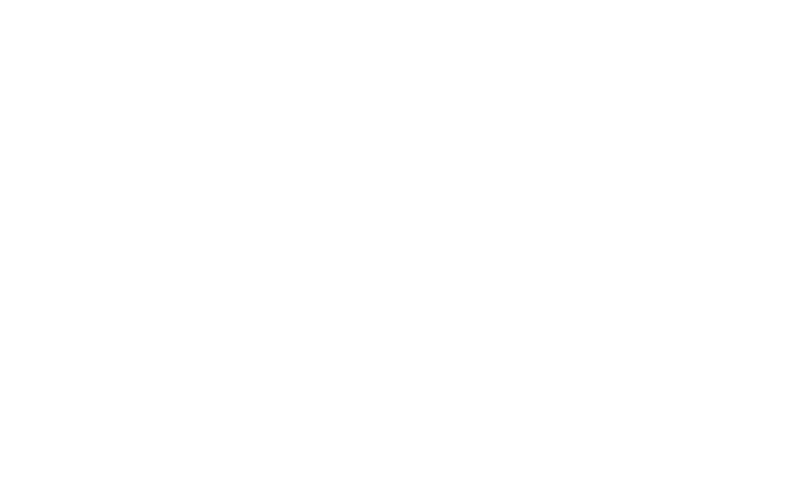

In [10]:
plt.figure(figsize = (10,6))

plot_tree(dt, 
          feature_names = X_train,
          class_names = ['ON TIME', 'NOT'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity = False);

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

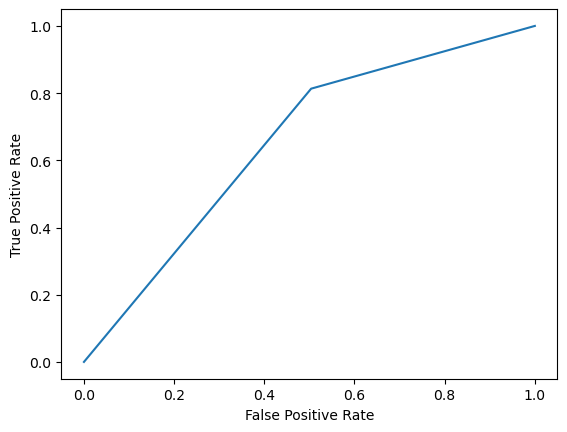

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [16]:
from sklearn.calibration import CalibrationDisplay

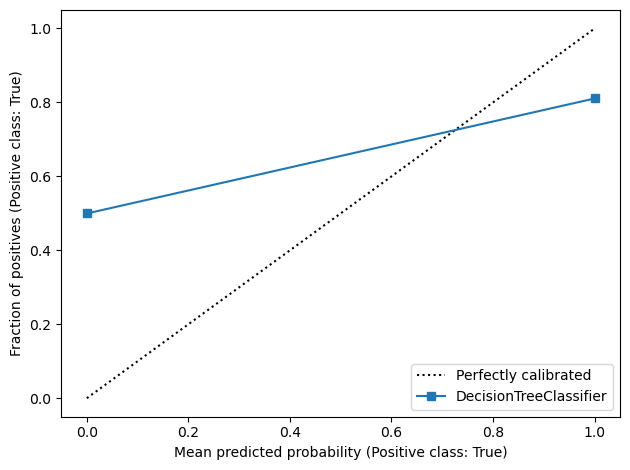

In [17]:
CalibrationDisplay.from_estimator(dt, X_test, y_test)
plt.tight_layout()

3. Try a shallow decistion tree. How does it compare to an unrestricted decision tree model?

In [18]:
shallow_dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

In [19]:
print(f'Test Set Accuracy: {accuracy_score(y_test, shallow_dt.predict(X_test))}\n')
print(classification_report(y_test, dt.predict(X_test)))

Test Set Accuracy: 0.7792224346717654

              precision    recall  f1-score   support

       False       0.50      0.50      0.50      4295
        True       0.81      0.81      0.81     11395

    accuracy                           0.73     15690
   macro avg       0.66      0.65      0.66     15690
weighted avg       0.73      0.73      0.73     15690



In [20]:
print(f'Test Set Accuracy: {accuracy_score(y_test, dt.predict(X_test))}\n')
print(classification_report(y_test, dt.predict(X_test)))

Test Set Accuracy: 0.7264499681325686

              precision    recall  f1-score   support

       False       0.50      0.50      0.50      4295
        True       0.81      0.81      0.81     11395

    accuracy                           0.73     15690
   macro avg       0.66      0.65      0.66     15690
weighted avg       0.73      0.73      0.73     15690



In [21]:
mid_dt = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)

In [22]:
print(f'Test Set Accuracy: {accuracy_score(y_test, mid_dt.predict(X_test))}\n')
print(classification_report(y_test, dt.predict(X_test)))

Test Set Accuracy: 0.7861695347355003

              precision    recall  f1-score   support

       False       0.50      0.50      0.50      4295
        True       0.81      0.81      0.81     11395

    accuracy                           0.73     15690
   macro avg       0.66      0.65      0.66     15690
weighted avg       0.73      0.73      0.73     15690



In [23]:
#They all seem to do exactly the same? 

How does a random forest or gradient boosting model compare? What features do this models place high importance on?

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(f'Test Set Accuracy: {accuracy_score(y_test, rf.predict(X_test))}\n')
print(classification_report(y_test, rf.predict(X_test)))

Test Set Accuracy: 0.788655194391332

              precision    recall  f1-score   support

       False       0.66      0.47      0.55      4295
        True       0.82      0.91      0.86     11395

    accuracy                           0.79     15690
   macro avg       0.74      0.69      0.71     15690
weighted avg       0.78      0.79      0.78     15690



In [ ]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
print(f'Test Set Accuracy: {accuracy_score(y_test, gbc.predict(X_test))}\n')
print(classification_report(y_test, gbc.predict(X_test)))

In [ ]:
importances = pd.DataFrame({
    'variable': predictors,
    'importance': gbc.feature_importances_
})

importances.sort_values('importance', ascending = False).head(10)